# Map of AirBnb prices in Paris

### Setup

In [65]:
import matplotlib.pyplot as plt
import matplotlib.cm
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as colors
import matplotlib.cm as cm
import numpy as np
import pandas as pd

### Read in and clean price data

In [66]:
prices = pd.read_csv('../data/listings.csv')
prices = prices.loc[:,['price', 'latitude', 'longitude']]
prices.head()

,price,latitude,longitude
0,125,48.869933,2.362511
1,75,48.833494,2.318518
2,115,48.851001,2.358690
3,115,48.857576,2.352751
4,99,48.874642,2.343411


In [67]:
prices['price'].describe()

count    59881.000000
mean       110.784339
std        230.734332
min          0.000000
25%         55.000000
50%         80.000000
75%        119.000000
max      25000.000000
Name: price, dtype: float64

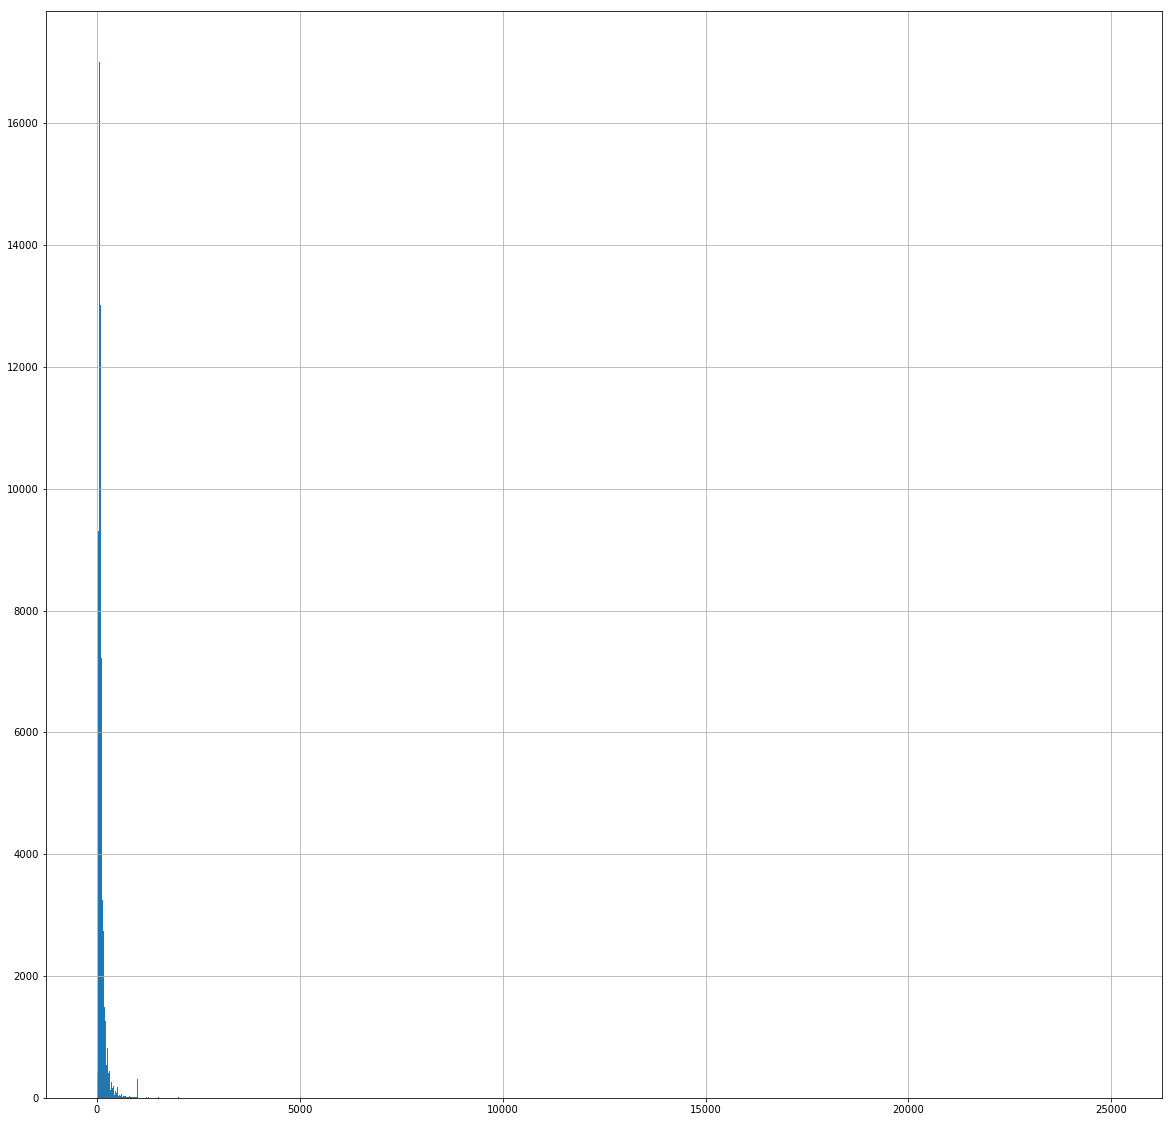

In [68]:
prices['price'].hist(bins=1000)
plt.show()

The outliers will skew our color mapping. We will need a log scale.

In [72]:
# Also filter out super large outliers to make maps more visible
prices = prices.loc[prices['price']<=2000]

### Build basic map with Basemap and shapefile

In [73]:
lon, lat = prices['longitude'].values, prices['latitude'].values

# Get max lons and lats
lat_min = min(lat)
lat_max = max(lat)
lon_min = min(lon)
lon_max = max(lon)

In [74]:
# Create Map
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
lons, lats = m(prices['longitude'].values, prices['latitude'].values)

Uncomment the below cell to draw the outline of the arrondissements. I decided I liked the map better without it.

In [75]:
# m.readshapefile('../data/arrondissements/arrondissements', 'city')

### Scatter plot!

In [ ]:
color_var = prices['price'].values

matplotlib.rcParams['figure.figsize'] = [20, 20]
m.scatter(
    lons,
    lats, 
    c=color_var, 
    norm=colors.LogNorm(),
    cmap='YlGnBu', 
    s=3,
    alpha=0.7)
plt.box(on=None)
plt.colorbar(shrink=0.5)
plt.tight_layout()
plt.savefig('../plots/paris_bnb_prices.png')
plt.show()

/home/ec2-user/anaconda2/envs/paris-airbnb/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/ec2-user/anaconda2/envs/paris-airbnb/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
